## Running a Centrality analysis on the Capetown Street Network
The purpose of this section is to conduct a mobility assessment on the Capetown street network.

This notebook will focus on 3 Centrality metrics, Eigenvector, Betweenness and Closeness Centrality of each street segment.

In [2]:
# load packages for analysis
import ast
import contextily as ctx
import dask.dataframe as dd
import dask_geopandas as dg
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import networkx as nx
import osmnx as ox
import pandas as pd
import pyogrio
import seaborn as sns
from xml import etree
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from shapely.geometry import Point
from shapely.geometry import LineString, MultiLineString
import shapely.wkt
import statsmodels.api as sm

### 1. Reading in Data and Preparing Data for Analysis

#### 1a. Reading in Data and plotting

In [21]:
# Define the place name
G = nx.read_graphml("G_cpt.graphml")

KeyError: 'crs'

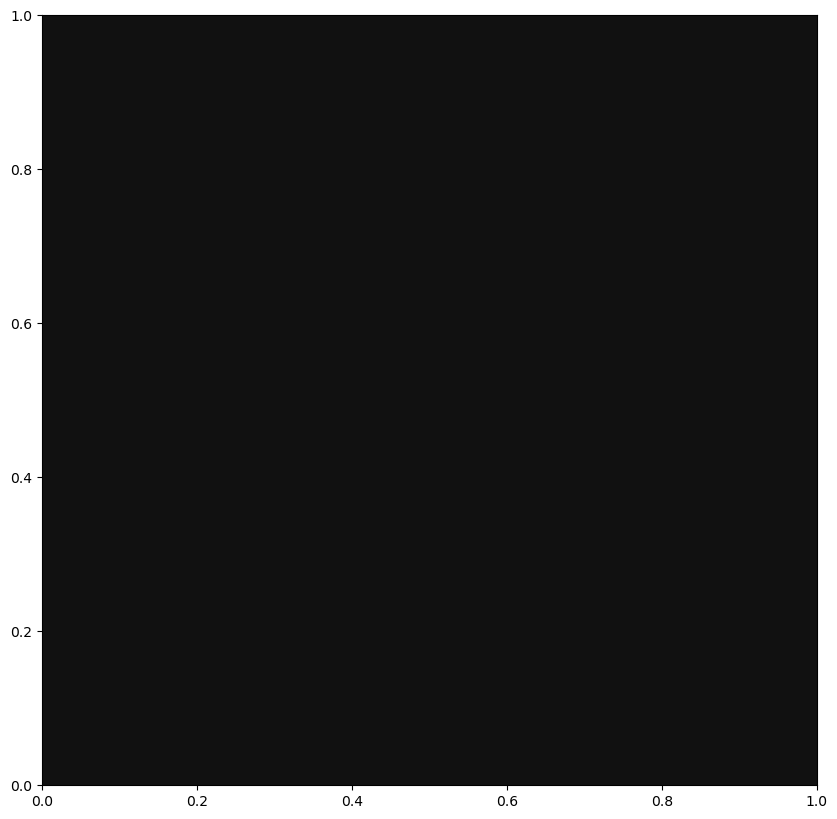

In [22]:
ox.plot.plot_graph(G, figsize=(10, 10), node_size=15)

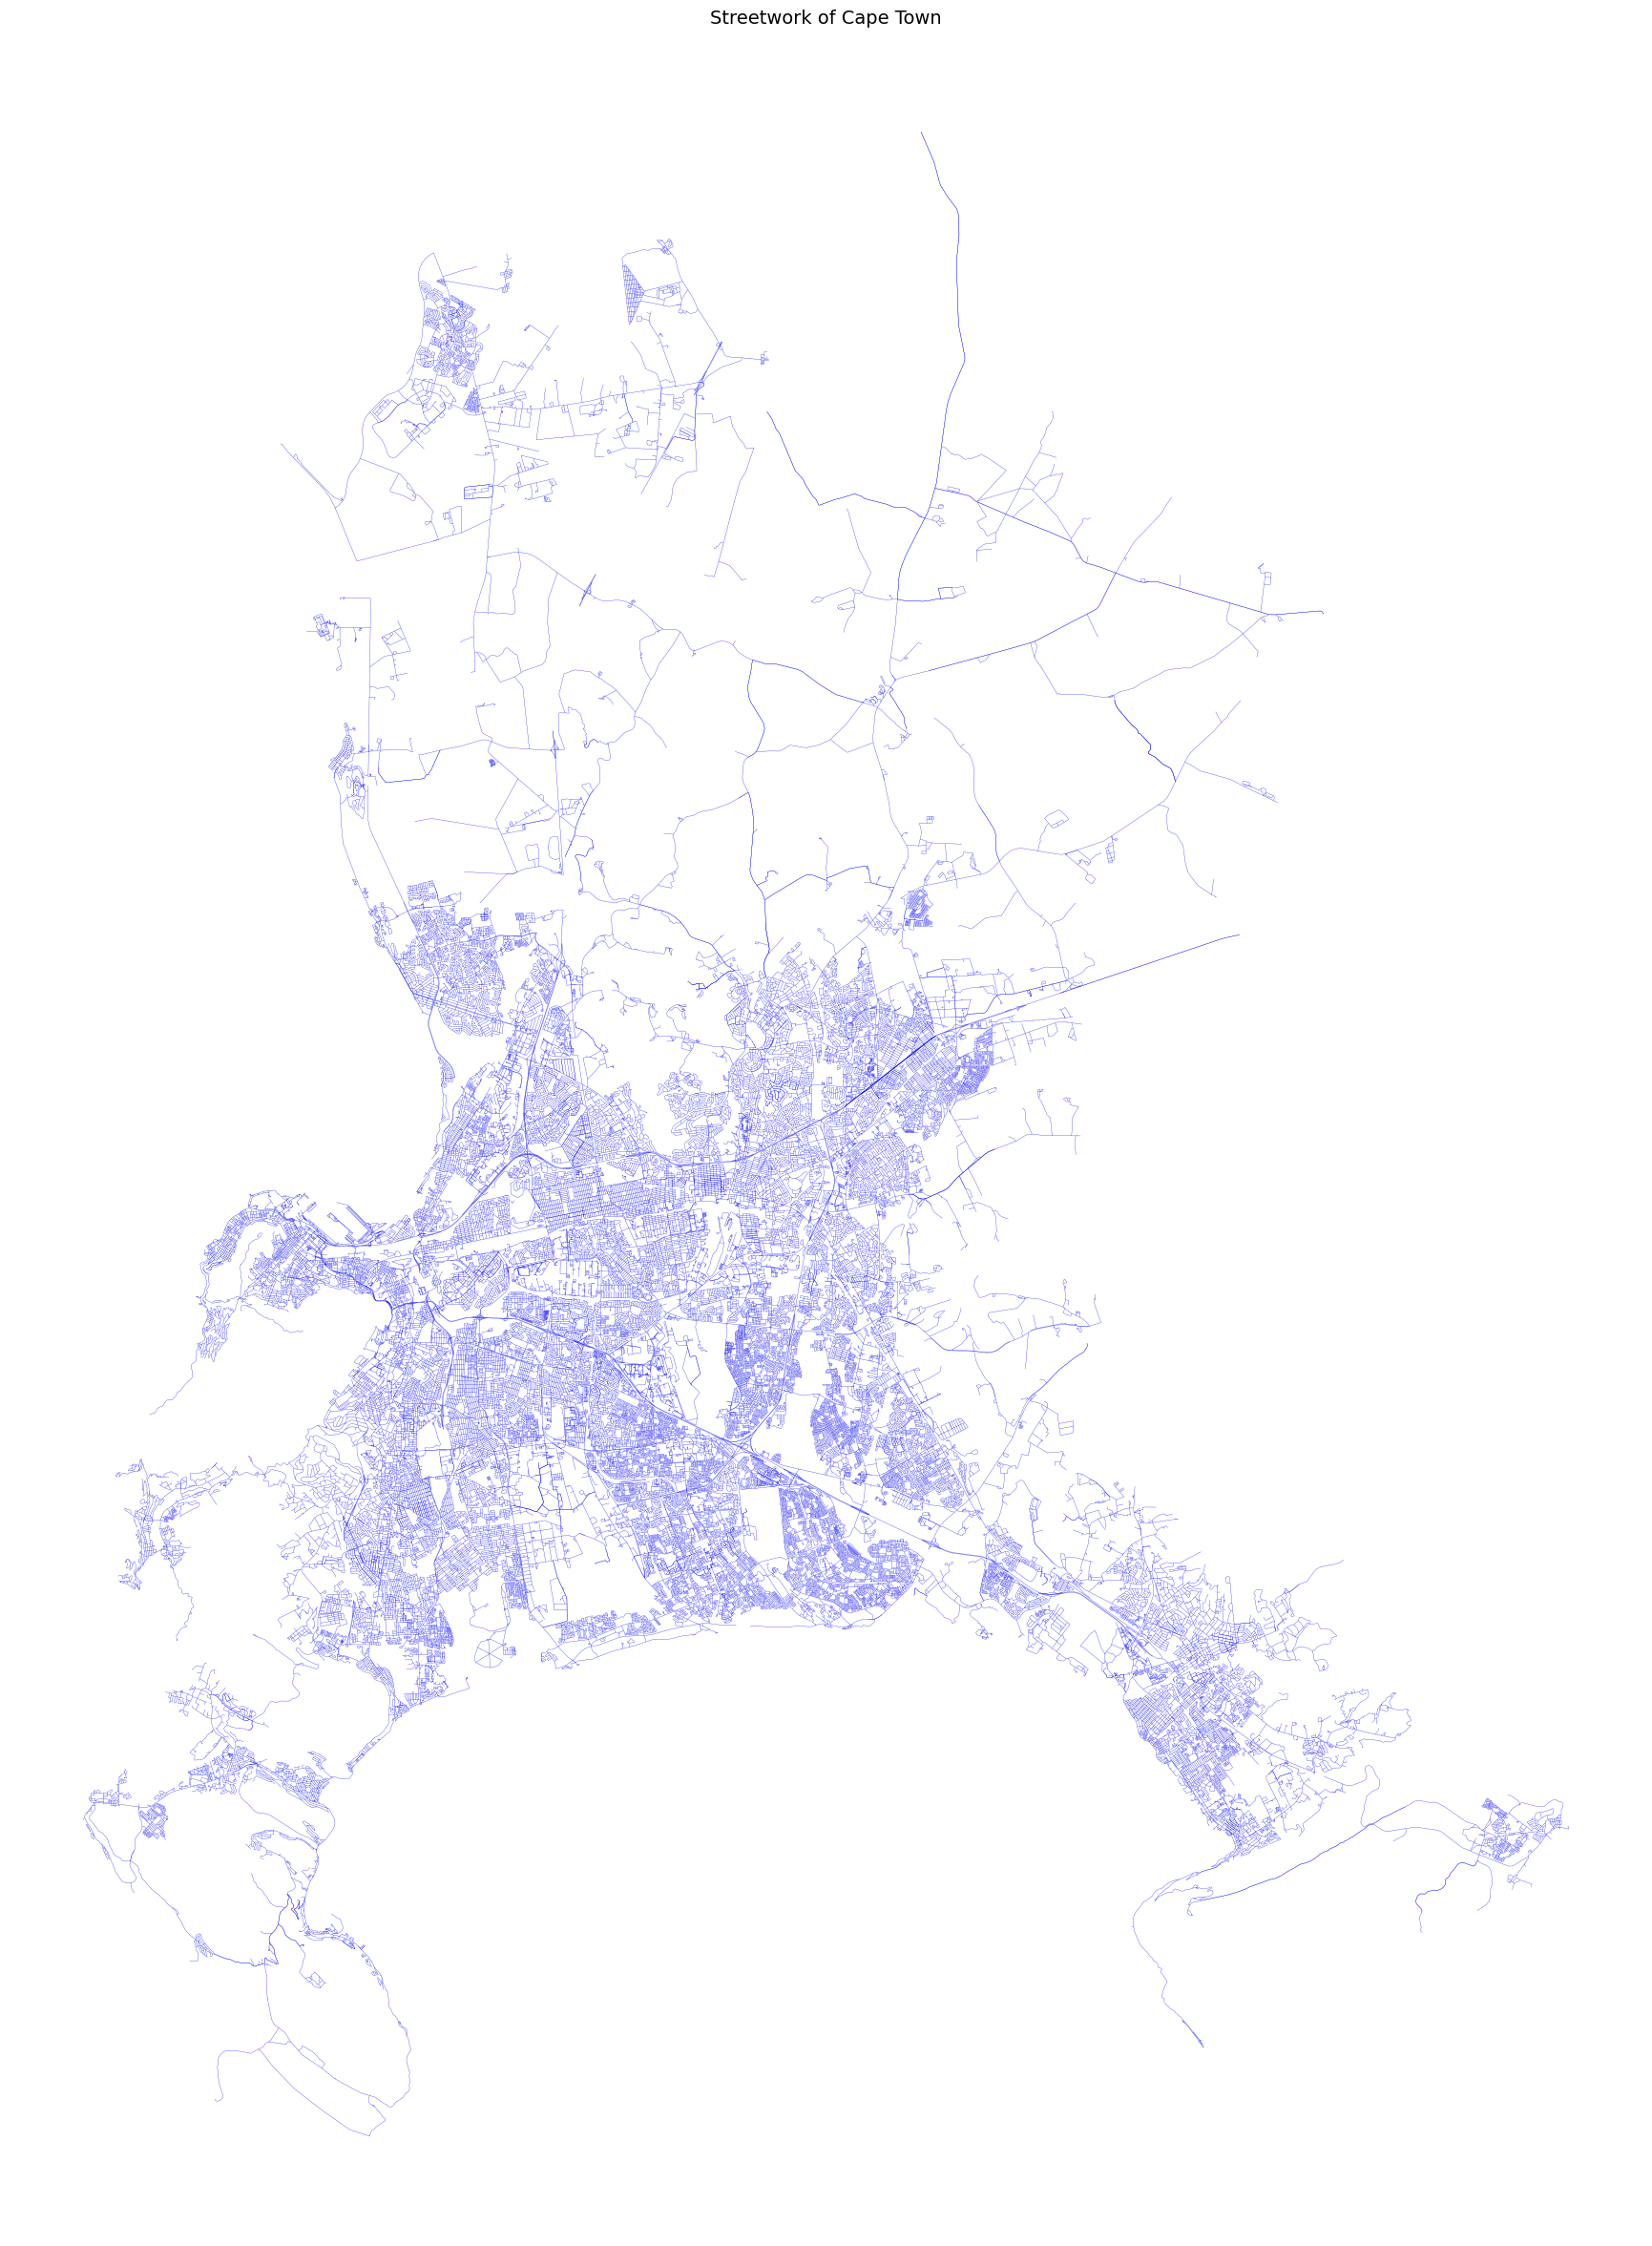

In [15]:
# Plot the data
fig, ax = plt.subplots(figsize=(30, 30))
cpt.plot(ax=ax, linewidth=0.2, edgecolor="blue")

# Add title and remove axis
ax.set_title("Streetwork of Cape Town", fontsize=14)
ax.axis("off")

plt.show()

#### 1b. Convert Dataset into a graph to be understood by osmnx

In [17]:
# Create an undirected graph
G = nx.Graph()

# Add edges from the GeoDataFrame
for _, row in cpt.iterrows():
    if not np.isnan(row["u"]) and not np.isnan(row["v"]):
        G.add_edge(int(row["u"]), int(row["v"]), length=row["geometry"].length)

KeyError: 'crs'

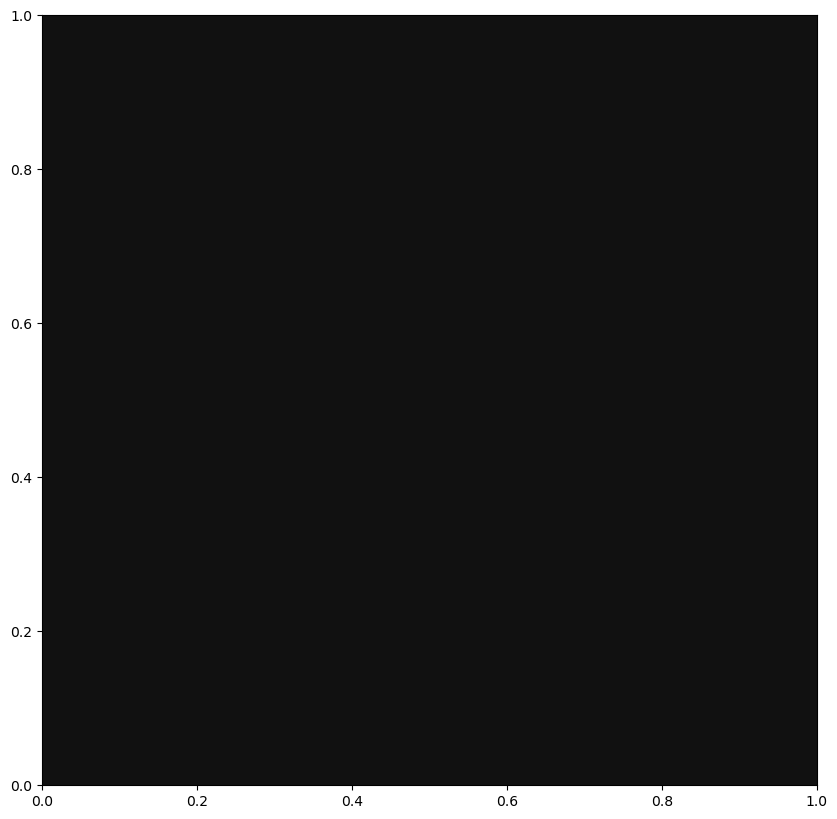

In [18]:
ox.plot.plot_graph(G, figsize=(10, 10), node_size=15)